In [2]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import scipy as sc
import os
import datetime
import logging as log
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import windrose as wr


<AxesSubplot: xlabel='w', ylabel='t'>

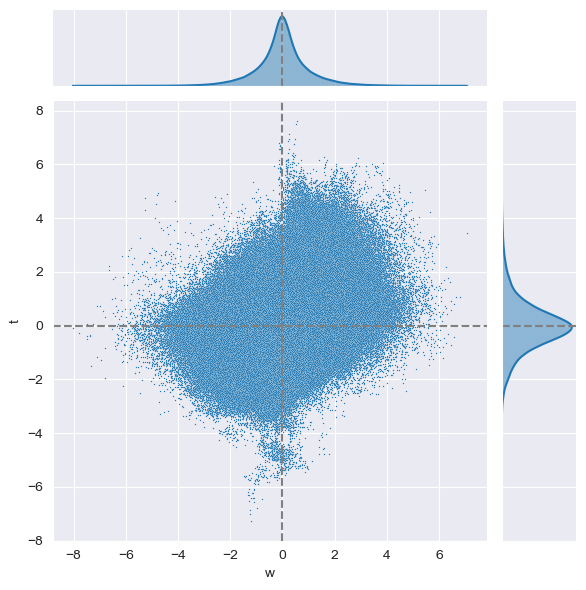

In [427]:
g = sns.JointGrid(x=x, y=y)

g.plot_marginals(sns.histplot, kde=True)
g.refline(x=0, y=0)
sns.scatterplot(x=x, y=y, s=1, ax=g.ax_joint)

In [5]:
path = '/Users/ilyadrozd/Desktop/TOWER_DATA/ncdf/'
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = [2021,2022]
levels = ['A1','A2','A3']
H = [2.2, 11.1, 18.8]

log = None

extension = '.nc'
avg_period = 30  # minutes
frequency = 20  # Hz
len_avg_period = avg_period*frequency*60
min_data_availability = 90  # % (минимальное количество данных в периоде осреднения, чтобы он учитывался)
iterations = 20 # количество итераций при удалении пиков

step = datetime.timedelta(minutes=avg_period)


### Расчет статистических моментов

In [7]:
path = '/Users/ilyadrozd/Desktop/TOWER_DATA/ncdf/'
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = [2021,2022]
levels = ['A1','A2','A3']
H = [2.2, 11.1, 18.8]

log = None

extension = '.nc'
avg_period = 30  # minutes
frequency = 20  # Hz
len_avg_period = avg_period*frequency*60
min_data_availability = 90  # % (минимальное количество данных в периоде осреднения, чтобы он учитывался)
iterations = 20 # количество итераций при удалении пиков

step = datetime.timedelta(minutes=avg_period)

for year in years:
    for m_s, m_e in zip(months,months[1:]+months[1]):
        
        start = pd.to_datetime(f'{year}-{m_s}-01 00:00:00')
        
        if m_s=='12':
            stop = pd.to_datetime(f'{year+1}-01-01 00:00:00')+datetime.timedelta(microseconds=1)
        else:
            stop = pd.to_datetime(f'{year}-{m_e}-01 00:00:00')+datetime.timedelta(microseconds=1)
        
        for level, h in zip(levels, H):
            
            input_path = os.path.join(path,level,str(year),m_s)
            
            if os.path.exists(input_path):
                
                output_path = os.path.join(path,'output',level,str(year))
                
                if log:
                    log = open(os.path.join(output_path, f'{level}_{year}_{m_s}_log_{avg_period}_min.txt'),'w')
                    print(level,year,m_s)
                
                print(f'level = {level}', f'year = {year}', f'm_s = {m_s}', f'path = {input_path}', f'extension = {extension}',
                      f'avg_period = {avg_period}  # minutes', f'frequency = {frequency}  # Hz', 
                      f'min_data_availability = {min_data_availability}  # %', f'len_avg_period = {len_avg_period}',
                      f'step = {step}',f'start = {start}',f'stop = {stop}',
                      '\n==========================================================================\n',  sep='\n', file=log)


                print('Считывание данных\n',  file=log)
                if log: print('Считывание данных')
                df = read_all_files(input_path, nc_to_df, extension, log=log)

                if 'A1' in input_path:
                    df['u'],df['v'] = df['v'],df['u']   
    
                print('\n==========================================================================\n',  file=log)
                try:
                    processing(df, avg_period, start, stop, frequency, path=output_path, log=log)
                except:
                    print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                    print(f'Обработка закончилась ошибкой:', level,year,m_s)
                    print(f'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
            else:
                print(f'Error: path not found {input_path}')
                

level = A1
year = 2020
m_s = 11
path = /Users/ilyadrozd/Desktop/TOWER_DATA/ncdf/A1/2020/11
extension = .nc
avg_period = 30  # minutes
frequency = 20  # Hz
min_data_availability = 90  # %
len_avg_period = 36000
step = 0:30:00
start = 2020-11-01 00:00:00
stop = 2020-12-01 00:00:00.000001


Считывание данных

Найдено файлов: 30
MSU_A1_2020-11-01.nc
MSU_A1_2020-11-02.nc
MSU_A1_2020-11-03.nc
MSU_A1_2020-11-04.nc
MSU_A1_2020-11-05.nc
MSU_A1_2020-11-06.nc
MSU_A1_2020-11-07.nc
MSU_A1_2020-11-08.nc
MSU_A1_2020-11-09.nc
MSU_A1_2020-11-10.nc
MSU_A1_2020-11-11.nc
MSU_A1_2020-11-12.nc
MSU_A1_2020-11-13.nc
MSU_A1_2020-11-14.nc
MSU_A1_2020-11-15.nc
MSU_A1_2020-11-16.nc
MSU_A1_2020-11-17.nc
MSU_A1_2020-11-18.nc
MSU_A1_2020-11-19.nc
MSU_A1_2020-11-20.nc
MSU_A1_2020-11-21.nc
MSU_A1_2020-11-22.nc
MSU_A1_2020-11-23.nc
MSU_A1_2020-11-24.nc
MSU_A1_2020-11-25.nc
MSU_A1_2020-11-26.nc
MSU_A1_2020-11-27.nc
MSU_A1_2020-11-28.nc
MSU_A1_2020-11-29.nc
MSU_A1_2020-11-30.nc
Прочитано файлов: 30


Проверка абсолютных 



Расчет средних значений



Расчет пульсаций



Расчет вторых моментов



Расчет третьих моментов

Расчет "теоретических" третьих моментов


level = A3
year = 2020
m_s = 11
path = /Users/ilyadrozd/Desktop/TOWER_DATA/ncdf/A3/2020/11
extension = .nc
avg_period = 30  # minutes
frequency = 20  # Hz
min_data_availability = 90  # %
len_avg_period = 36000
step = 0:30:00
start = 2020-11-01 00:00:00
stop = 2020-12-01 00:00:00.000001


Считывание данных

Найдено файлов: 29
MSU_A3_2020-11-01.nc
MSU_A3_2020-11-02.nc
MSU_A3_2020-11-03.nc
MSU_A3_2020-11-04.nc
MSU_A3_2020-11-05.nc
MSU_A3_2020-11-06.nc
MSU_A3_2020-11-07.nc
MSU_A3_2020-11-08.nc
MSU_A3_2020-11-09.nc
MSU_A3_2020-11-10.nc
MSU_A3_2020-11-11.nc
MSU_A3_2020-11-12.nc
MSU_A3_2020-11-13.nc
MSU_A3_2020-11-14.nc
MSU_A3_2020-11-15.nc
MSU_A3_2020-11-16.nc
MSU_A3_2020-11-17.nc
MSU_A3_2020-11-18.nc
MSU_A3_2020-11-20.nc
MSU_A3_2020-11-21.nc
MSU_A3_2020-11-22.nc
MSU_A3_2020-11-23.nc
MSU_A3_2020-11-24.nc
MSU_A3_2020-11-25.nc
MSU_A3_2020-11-26.nc
MSU_A3

The rotation 1 about the z axis is completed
The rotation 2 about the y axis is completed
The rotation 3 about the x axis is completed


Проверка на асимметрию (skewness) и эксцесс (kurtosis)



Проверка на количесвто пропусков



Расчет средних значений



Расчет пульсаций



Расчет вторых моментов



Расчет третьих моментов

Расчет "теоретических" третьих моментов


level = A2
year = 2020
m_s = 12
path = /Users/ilyadrozd/Desktop/TOWER_DATA/ncdf/A2/2020/12
extension = .nc
avg_period = 30  # minutes
frequency = 20  # Hz
min_data_availability = 90  # %
len_avg_period = 36000
step = 0:30:00
start = 2020-12-01 00:00:00
stop = 2021-11-01 00:00:00.000001


Считывание данных

Найдено файлов: 31
MSU_A2_2020-12-01.nc
MSU_A2_2020-12-02.nc
MSU_A2_2020-12-03.nc
MSU_A2_2020-12-04.nc
MSU_A2_2020-12-05.nc
MSU_A2_2020-12-06.nc
MSU_A2_2020-12-07.nc
MSU_A2_2020-12-08.nc
MSU_A2_2020-12-09.nc
MSU_A2_2020-12-10.nc
MSU_A2_2020-12-11.nc
MSU_A2_2020-12-12.nc
MSU_A2_2020-12-13.nc
MSU_A2_2020-12-14.nc
MSU_A2_2

The rotation 1 about the z axis is completed
The rotation 2 about the y axis is completed
The rotation 3 about the x axis is completed


Проверка на асимметрию (skewness) и эксцесс (kurtosis)



Проверка на количесвто пропусков



Расчет средних значений



Расчет пульсаций



Расчет вторых моментов



Расчет третьих моментов

Расчет "теоретических" третьих моментов




In [3]:
def processing(df, step, start, stop, frequency, path, log=None):
    
    
    len_avg_period = frequency*step*60
    step = datetime.timedelta(minutes=step)

    
    print('Проверка абсолютных значений\n',  file=log)
    if log: print('Проверка абсолютных значений')
    absolute_limits(df.u, Max=30, Min=-30)
    absolute_limits(df.v, Max=30, Min=-30)
    absolute_limits(df.w, Max=5, Min=-5)
    absolute_limits(df.t, Max=40, Min=-40)
    print('\n==========================================================================\n',  file=log)
    

    print('Удаление пиков\n',  file=log)
    if log: print('Удаление пиков')
    df[['t','u','v']] = drop_spikes(df[['t','u','v']], step, nsig=3.5, n=3, start=start, stop=stop, log=log)
    df['w'] = drop_spikes(df.w, step, nsig=5, n=3, start=start, stop=stop, log=log)                
    print('\n==========================================================================\n',  file=log)
    
    
    print('Детрендинг\n',  file=log)
    if log: print('Детрендинг')
    df = detrend(df, step, start=start, stop=stop, mode='dwm', min_val=3)
    print('\n==========================================================================\n',  file=log)

    
    print('Поворот осей\n',  file=log)
    if log: print('Поворот осей')
    df[['u_rot','v_rot','w_rot']], angles = axis_rotations(df, step, D=3, start=start, stop=stop, log=log)
    angles.to_csv(os.path.join(path,f'{level}_{year}_{m_s}_rot_angles_{avg_period}_min.csv'))
    print('\n==========================================================================\n',  file=log)

    
    print('Проверка на асимметрию (skewness) и эксцесс (kurtosis)\n',  file=log)
    if log: print('Проверка на асимметрию (skewness) и эксцесс (kurtosis)')
    df_skewed = skewnes(df, step, start, stop)
    df_kurted = kurtosis(df, step, start, stop)
    df_skewed.to_csv(os.path.join(path,f'{level}_{year}_{m_s}_skewness_{avg_period}_min.csv'))
    df_kurted.to_csv(os.path.join(path,f'{level}_{year}_{m_s}_kurtosis_{avg_period}_min.csv'))
    print('\n==========================================================================\n',  file=log)

    
    print('Проверка на количесвто пропусков\n',  file=log)
    if log: print('Проверка на количесвто пропусков')
    df_counted = counts(df, step, start=start, stop=stop)
    df_counted.to_csv(os.path.join(path,f'{level}_{year}_{m_s}_values_per_{avg_period}_min.csv'))
#     min_val = len_avg_period*min_data_availability/100
#     mask = df_counted < min_val
#     print(f'Периодов осреднения, содержащих меньше {min_val} значений:',  file=log)
#     print(mask.sum(),  file=log)
    print('\n==========================================================================\n',  file=log)

    
    print('Расчет средних значений\n',  file=log)
    if log: print('Расчет средних значений')
    moments = means(df, step, start=start, stop=stop)
#     moments.mask(mask, inplace=True)
    moments['abs_uh'] = (moments.u_rot**2+moments.v_rot**2)**0.5
    dir_uh = 180+np.floor(np.degrees(np.arctan2(moments.u,moments.v)))
    moments['dir_uh'] = np.where(dir_uh==360, 0, dir_uh)
    print('\n==========================================================================\n',  file=log)


    print('Расчет пульсаций\n',  file=log)
    if log: print('Расчет пульсаций')
    puls = pulsations(df[['u_rot','v_rot','w_rot','t']], step, start=start, stop=stop,
                      df_meaned=moments[['u_rot','v_rot','w_rot','t']], mask=None)
    print('\n==========================================================================\n',  file=log)


    print('Расчет вторых моментов\n',  file=log)
    if log: print('Расчет вторых моментов')
    moments['std_Uh'] = stds(np.sqrt(puls.u_rot**2 + puls.v_rot**2), step, start, stop)

    moments['uu'] = turb_moments(puls[['u_rot']*2], step, start, stop)
    moments['vv'] = turb_moments(puls[['v_rot']*2], step, start, stop)
    moments['ww'] = turb_moments(puls[['w_rot']*2], step, start, stop)
    moments['tt'] = turb_moments(puls[['t']*2], step, start, stop)

    moments['wu'] = turb_moments(puls[['w_rot','u_rot']], step, start, stop)
    moments['wv'] = turb_moments(puls[['w_rot','v_rot']], step, start, stop)
    moments['wt'] = turb_moments(puls[['w_rot','t']], step, start, stop)

    moments['wuh'] = (moments.wu**2+moments.wv**2)**0.5
    moments['u_star'] = moments.wuh**0.5
    moments['L'] = -(moments.t+273.15)*moments.u_star**3/(9.8*0.4*moments.wt) 
    moments['zeta'] = h/moments.L

    moments['TKE'] = (moments.uu+moments.vv+moments.ww)/2
    moments['A'] = moments.ww/(moments.uu+moments.vv+moments.ww)
    print('\n==========================================================================\n',  file=log)


    print('Расчет третьих моментов\n',  file=log)
    if log: print('Расчет третьих моментов')
    moments['wuu'] = turb_moments(puls[['w_rot','u_rot','u_rot']], step, start, stop)
    moments['wvv'] = turb_moments(puls[['w_rot','v_rot','v_rot']], step, start, stop)
    moments['wtt'] = turb_moments(puls[['w_rot','t','t']], step, start, stop)
    moments['wwt'] = turb_moments(puls[['w_rot','w_rot','t']], step, start, stop)

    moments['uuu'] = turb_moments(puls[['u_rot']*3], step, start, stop)
    moments['vvv'] = turb_moments(puls[['v_rot']*3], step, start, stop)
    moments['www'] = turb_moments(puls[['w_rot']*3], step, start, stop)
    moments['ttt'] = turb_moments(puls[['t']*3], step, start, stop)

    print('Расчет "теоретических" третьих моментов',  file=log)
    moments['wuu_th'] = moments.uuu/moments.uu*moments.wu
    moments['wvv_th'] = moments.vvv/moments.vv*moments.wv
    moments['wtt_th'] = moments.ttt/moments.tt*moments.wt
    moments['wwt_th'] = moments.www/moments.ww*moments.wt
    print('\n==========================================================================\n',  file=log)

    moments.to_csv(os.path.join(path,f'{level}_{year}_{m_s}_turb_stats_{avg_period}_min.csv'))
    
    if log:
        log.close()
    

In [20]:
def log_test(x):
    log.info('hello world')
    return x**2
    

In [16]:
import logging as log


In [21]:
log_test(2)



4

In [32]:
np.sin?

In [29]:
type(step)

datetime.timedelta

In [2]:

def nc_to_df(file):
    '''
    Базовая читалка: netcdf -> df
    
    Parameters
    ----------
    file : str
        Имя файла.
    
    Returns
    -------
    Объект pd.DataFrame, содержащий данные из считанного файла.
    '''
    
    ds = nc.Dataset(file)
    
    return pd.DataFrame(np.array([ds['u'][:],ds['v'][:],ds['w'][:],ds['temp'][:]]).T,
                  index=ds['time'][:], columns=['u','v','w','t'])


def read_all_files(path, func, extension=''):
    '''
    Последовательно считывает в алфавитном порядке все файлы в папке path, содержащие в названии extension, читалкой func и объединяет их в один df.
    
    Parameters
    ----------
    path : str
        Имя папки из которой нужно считать данные.
    func : function
        Читалка для одного файла (например  nc_to_df).
    extension : str; optional
        Фильтрует содержащиеся в папке path файлы по наличию в их названии extension.
        Если неуказано, функция попытается прочесть все файлы, которые есть в папке.
        Default: ''
    
    Returns
    -------
    Объект pd.DataFrame, содержащий данные из всех считанных файлов. 
    
    
    Для нормальной работы функции необходимо, чтобы считываемые файлы были однотипными и все читались функцией func.
    Поддерживает логирование.
    При ошибке считывания выдаст сообщение об ошибке и продолжит считывание со следующего файла.
    '''
    
    files = os.listdir(path)
    files = [file for file in files if extension in file]
    files.sort()
    
    i=0
    df = pd.DataFrame()
    log.info(f'Найдено файлов: {len(files)}')
    for file in files:
        try:
            new_df = func(os.path.join(path,file))

            df = pd.concat([df,new_df])
            log.info(f'{file}')
            i+=1
        except:
            log.error(f'Ошибка: {file}')
            break
    df.index = pd.to_datetime(df.index, unit='s')
    log.info(f'Прочитано файлов: {i}')
    return df


def ax_c(x,a,c):
    return a*x+c

def ax2_c(x,a):
    return a*x**2


def moving_sum(data, n):
    '''
    Считает по data сумму в скользящем окне размера n. 
    
    Parameters
    ----------
    data : array_like
        Ряд данных.
    n : int
        Окно осреднения.
    
    Returns
    -------
    Объект np.array, массив сумм по ряду data в окне осреднения n. 
    Длина массива: len(data)-(n-1)
    
    Examples
    --------
    >>> moving_sum(data=[1,2,3,7,10], n=3) 
    [[1,2,3],7,10] -> [6,]; 
    [1,[2,3,7],10] -> [6,12,]; 
    [1,2,[3,7,10]] -> [6,12,20] 
    >>> [6,12,20]
    '''
    
    ret = np.nancumsum(data, dtype=np.float64)  # считаем кумулятивную сумму
    ret[n:] = ret[n:]-ret[:-n] # вычитаем все, что накопилось до начала окна суммирования 
    
    return ret[n-1:] 

def bins(step, ser=None, start=None, stop=None):
    '''
    Генерирует интервалы разбиения временной серии ser от start до stop с шагом step
    
    Parameters
    ----------
    step : int, float, Timedelta
        Шаг, с которым генереруются границы интервалов (период осреднения). 
    ser : pd.DataFrame or pd.Series; optional
        Массив данных, по которому будет производится разбиение.
        Default: None 
    start : int, float, Timestamp; optional
        Начало обрабатываемого периода. Если неуказано, берется первый индекс ser (не рекомендуется).
        Default: None
    stop : int, float, Timestamp; optional
        Конец обрабатываемого периода. Если неуказано, берется последний индекс ser (не рекомендуется).
        Default: None

    Returns
    ------- 
    Объект pandas.core.arrays.categorical.Categorical, содержащий интервалы разбиения временной серии ser.
    
    Функция поддреживает работу с ser, содержащими пропуски и пустые значениями np.nan.
    Если start и/или stop не задан, функция определит его автоматически на основе ser как первый и последний индекс массива (не рекомендуется).
    Сгенерированные границы периодов осреднения включают левое значение периода осреднения "[" и не включают правое ")".   
    
    !!!внимание!!! 
    Во избежание неточностей в выделяемых периодах осреднения стартовое значение start и конечное значение stop рекомендуется задавать явно.
    Генерация границ интервалов происходит по средствам функции np.arange(start, stop, step). 
    Как следстиве, генерируемые интервалы не включают границу stop, что может привести к "потере последнего периода осреднения" при автоматическом определении значения stop.
    Например, если необоходимо получить разбиение по индексам от 0 до 100 с шагом 10, необоходимо задавать stop = 100.001 (минимально превышающий требуемое значение).
    Если задать stop = 100 последний период осреднения будет [80:90) (см. документацию к функции np.arange).  
    '''
    
    if start is None: start = ser.index[0]
    if stop is None: stop = ser.index[-1]
    
    new_indces = np.arange(start, stop, step)
    
    return pd.cut(ser.index, bins=new_indces, right=False, include_lowest=True)
    
    
def axis_rotations(df, step, D=2, start=None, stop=None, u_name='u', v_name='v', w_name='w', inplace=False):
    '''
    Поворачивает оси компонент скорости ветра вдоль преобладающего потока.  
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame, содержащий компоненты скорости u, v, w.  
    step : int, float, Timedelta
        Период осреднения.
    D : int; optional
        Количество поворотов осей. Для измерений над неоднородной поверхностью рекомендуется использовать 2 поворота (Finnigan, 2004)
        Default: 2
    start : int, float, Timestamp; optional
        Начало обрабатываемого периода. Если неуказано, берется первый индекс df (не рекомендуется, см. bins).
        Default: None
    stop : int, float, Timestamp; optional
        Конец обрабатываемого периода. Если неуказано, берется последний индекс df (не рекомендуется, см. bins).
        Default: None
    u_name : str; optional
        Название колонки df, содержащей компоненту скорости u.
        Default: 'u'
    v_name : str; optional
        Название колонки df, содержащей компоненту скорости v.
        Default: 'v'
    w_name : str; optional
        Название колонки df, содержащей компоненту скорости w.
        Default: 'w'
    inplace : bool; optional
        Если False, сделает копию входного df, если True изменит входной df.
        Default: False
        
    Returns
    -------
    df : Объект pd.DataFrame идентичный входному df, содержащий развернутые компоненты скорости u, v, w.
    angle : Объект pd.DataFrame, содержащий углы поворота по всем периодам осреднения.
    '''
    
    if inplace is False:
        df = df.copy()

    if D not in [1,2,3]:
        log.error('Недопустимое количество поворотов осей, D должно быть от 1 до 3.')
        return
    
    angle = pd.DataFrame()
    
    if D >= 1:
        df_meaned = means(df[[u_name, v_name]], step, start, stop)
        angle['Theta'] = np.arctan(df_meaned[v_name]/df_meaned[u_name])
                          
        rotation(df, u_name, v_name, angle.Theta, step)
        log.info('The rotation 1 about the z axis is completed.')
        
    if D >= 2:
        df_meaned = means(df[[u_name, w_name]], step, start, stop)
        angle['Phi'] = np.arctan(df_meaned[w_name]/df_meaned[u_name])                
        
        rotation(df, u_name, w_name, angle.Phi, step)
        log.info('The rotation 2 about the y axis is completed.')
    
    if D == 3:
        u1u2 = turb_moments(df[[v_name, w_name]], step, start, stop)
        u1u1 = turb_moments(df[[v_name, v_name]], step, start, stop)
        u2u2 = turb_moments(df[[w_name, w_name]], step, start, stop)
        angle['Psi'] = 0.5*np.arctan(2*u1u2/(u1u1-u2u2))
                                 
        rotation(df, v_name, w_name, angle.Psi, step)
        log.info('The rotation 3 about the x axis is completed.')
    
    return df[[u_name, v_name, w_name]], angle


def rotation(df, u1, u2, angle, step):
    '''
    Осуществляет поворот компонент скорости df.u1 и df.u2 на угол angle по всем периодам осреднения.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame, содержащий компоненты скорости u1 и u2.
    u1 : str
        Название колонки df, содержащей первую компоненту скорости.
    u2 : str
        Название колонки df, содержащей вторую компоненту скорости.
    angle : pd.Series
        Временная серия со значениями углов поворота для каждого периода осреднения. 
    step : int, float, Timedelta
        Период осреднения.
    
    Returns
    -------    
    Объект pd.DataFrame идентичный входному df, содержащий развернутые компоненты скорости u1, u2.
    '''
    
    sin = np.sin(angle)
    cos = np.cos(angle)

    U1 = df.u1.copy()
    U2 = df.u2.copy()

    for ind in angle.index:
        df.loc[ind:ind+step, u1] = U1.loc[ind:ind+step]*cos.loc[ind] + U2.loc[ind:ind+step]*sin.loc[ind]
        df.loc[ind:ind+step, u2] = -U1.loc[ind:ind+step]*sin.loc[ind] + U2.loc[ind:ind+step]*cos.loc[ind]
        
    return df


def absolute_limits(ser, Max=40, Min=-40, log=None):
    
    before = ser.count()
    ser[(ser<Min)|(ser>Max)] = np.nan
    after = ser.count()
    print(f'Удалено значений {ser.name}: {before-after}', file=log)
    
    return ser


def detrend(ser, step, func=ax_c, start=None, stop=None, mode='detrend', min_val=3, inplace=False):
    '''
    Осуществялет по всем периодам осреднения удаление тренда из данных ser
    
    Parameters
    ----------
    
    Returns
    -------
    Объект аналогичный по типу и размеру ser с удаленным трендом, если mode='detrend'.
    Объект аналогичный по типу и размеру ser, содержащий только выделенный тренд, если mode='trend'.
    
    Функция поддерживает ввод ser только в формате pd.DataFrame и pd.Series, если формат не соответсвует указанному, функция сообщит о несовпадении формата и вернет пустой вывод.
    Функция поддерживает как числовые, так и временные индексы ser.
    Функция поддреживает работу с ser, содержащими пропуски и пустые значениями np.nan.
    Для применения опции inplace, используйте ввод ser=df или ser=df['val']. Функция не перезапишет исходный df, если использовать ввод ser=df[['val']], даже при inplace=True.   
    
    '''
    if isinstance(ser, pd.DataFrame):
        return ser.apply(lambda x: detrend(x, step, func, start, stop, mode, min_val, inplace))
    
    elif isinstance(ser, pd.Series):
    
        if  inplace is False:
            ser = ser.copy()

        if start is None: start = ser.index[0]
        if stop is None: stop = ser.index[-1]

        borders = np.arange(start,stop,step)

        for s, e in zip(borders[:-1],borders[1:]):

            if ser[s:e].count() >= min_val:

                x = np.arange(len(ser[s:e]))

                not_nan = np.logical_not(np.isnan(ser[s:e]))
                coef, _ = sc.optimize.curve_fit(func, x[not_nan], ser[s:e][not_nan])

                if mode == 'trend': ser[s:e] = func(x,*coef)
                elif mode == 'dwm': ser[s:e] -= (func(x,*coef)-ser[s:e].mean())
                else: ser[s:e] -= func(x,*coef)
            
            else:
                ser[s:e] = np.nan 

        return ser[start:stop]
    
    else: 
        print(f'{type(ser)} - недопустимый формат ser. Аргумент ser должен быть pd.DataFrame или pd.Series')
        return


def drop_spikes(ser, step, nsig=3.5, n=3, iterations=20,  start=None, stop=None, log=None, inplace=False):
    '''
    Удаление по всем периодам осреднения из ser значений превышающих порог в nsig стандартных отклонений от среднего значения и длиной менее n
    
    Parameters
    ----------
    ser: массив данных по которому будет производится фильтрация пиков
    step: шаг с которым генереруются границы интервалов (размер окна осреднения)
    nsig: размер допукстимого отклонения от среднего в стандатных отклонениях. Дефолт: 3.5
    n: длина допустимого отклонения. Дефолт: 3
    iterations: количесвто итераций фильтраций. Дефолт: 10
    start: начало обрабатываемого периода. Если неуказано, берется первый индекс ser (не рекомендуется). Дефолт: None
    stop: конец обрабатываемого периода. Если неуказано, берется последний индекс ser (не рекомендуется). Дефолт: None
    log: если True, записывает статистику удаленных пропусков на каждой интерации. Дефолт: True
    inplace: если True, записывает результат работы функции поверх входного массива ser. Дефолт: False  
    
    Returns
    -------
    Объект аналогичный по типу и размеру ser с пустыми значениями (np.nan) вместо пиков
    
    Функция поддерживает ввод ser только в формате pd.DataFrame и pd.Series, если формат не соответсвует указанному, функция сообщит о несовпадении формата и вернет пустой вывод.
    Функция поддерживает как числовые, так и временные индексы ser.
    Функция поддреживает работу с ser, содержащими пропуски и пустые значениями np.nan.
    Функция обращается к bins, которая производит разделение ser на периоды осредения, и обрабатывает весь входной временной ряд.    
    Значение считается пиковым и удаляется, если лежит за пределами mean+-nsig*std, где mean - матожидание, std - стандартное отклонение от матожидания.
    Если длина отклонения больше или равна n, превыше считается значимым и не удаляется.
    Функция обрабатывает один и тот же период осреднения пока не достигнуто заданное количества итераций iterations или пока все пики не будут удалены.
    Для применения опции inplace, используйте ввод ser=df или ser=df['val']. Функция не перезапишет исходный df, если использовать ввод ser=df[['val']], даже при inplace=True.   
    
    '''
    
    if isinstance(ser, pd.DataFrame):
        return ser.apply(lambda x: drop_spikes(x, step, nsig, n, iterations, start, stop, log, inplace))
    
    elif isinstance(ser, pd.Series):
        
        if inplace == False: ser = ser.copy()

        for iteration in range(iterations):

            df_binned = bins(step, ser, start, stop)
            ser_mean = ser.groupby(df_binned).mean()
            ser_std = ser.groupby(df_binned).std()
            ser_min = ser_mean - nsig*ser_std
            ser_max = ser_mean + nsig*ser_std
            df_binned = ser_mean.index

            miss_val_before = ser.isna().sum()

            for bins_, max_, min_ in zip(df_binned, ser_max, ser_min):

                mask = (ser[bins_.left:bins_.right]>max_)|(ser[bins_.left:bins_.right]<min_)  # определяем маску превышений
                msum = moving_sum(mask,n)  # считем для каждого элемента маски сумму в заданном окне 
                for i in np.where(msum >= n)[0]:  # сумма больше n означает, что в этом месте n или более подряд идущих превышений  
                    mask[i:i+n] = False  # исключаем из маски серии превышений длинее n  
                ser[bins_.left:bins_.right][mask] = np.nan  # удаляем превышения

            miss_val_after = ser.isna().sum()

            print(f'Value: {ser.name}, iteration: {iteration+1}, missing values: {miss_val_before}, delited spikes:{miss_val_after-miss_val_before}, total gaps:{miss_val_after} ({np.round(miss_val_after/len(df)*100,2)}%)', file=log)

            if miss_val_after-miss_val_before == 0: break
        return ser
    
    else: 
        print(f'{type(ser)} - недопустимый формат ser. Аргумент ser должен быть pd.DataFrame или pd.Series')
        return    


def means(df, step, start=None, stop=None, prefix=False):
    '''
    Считает средние значения по всему df от start до stop с заданным шагом step.
    
    Parameters
    ----------
    df : pd.DataFrame 
        DataFrame, содержащий данные для осреднения
    step : int, float, Timedelta
        Период осреднения.
    start : int, float, Timestamp; optional
        Начало обрабатываемого периода. Если неуказано, берется первый индекс df (не рекомендуется, см. bins).
        Default: None
    stop : int, float, Timestamp; optional
        Конец обрабатываемого периода. Если неуказано, берется последний индекс df (не рекомендуется, см. bins).
        Default: None
    prefix : bool
        Если True, преписывает префик "_mean" к названием колонок выходного DataFrame.  
        Default: False
    
    Returns
    -------
    Объект pd.DataFrame, содержащий осредненные значения по входному df.
    '''
    
    df_binned = bins(step, df, start, stop)
    df_meaned = df.groupby(df_binned).mean()
    
    df_meaned.index = df_meaned.index.categories.left
    
    if prefix: df_meaned = df_stded.add_prefix('_mean')

    return df_meaned


def stds(df, step, start=None, stop=None, prefix=False):
    '''
    
    Parameters
    ----------
    
    Returns
    -------
    
    '''
    
    df_binned = bins(step, df, start, stop)
    df_stded = df.groupby(df_binned).std()
    
    df_stded.index = df_stded.index.categories.left
    
    if prefix: df_stded = df_stded.add_prefix('_std')
        
    return df_stded


def counts(df, step, start=None, stop=None, prefix=False):
    '''
    
    Parameters
    ----------
    
    Returns
    -------
    
    '''
    
    df_binned = bins(step, df, start, stop)
    df_counted = df.groupby(df_binned).count()
    
    df_counted.index = df_counted.index.categories.left
    
    if prefix: df_counted = df_counted.add_prefix('_count') 
    
    return df_counted


def skewnes(df, step, start=None, stop=None, prefix=False):
    '''
    
    Parameters
    ----------
    
    Returns
    -------
    
    '''
    
    df_binned = bins(step, df, start, stop)
    df_skewed = df.groupby(df_binned).skew()
    
    df_skewed.index = df_skewed.index.categories.left
    
    if prefix: df_skewed = df_skewed.add_prefix('_skew')   
    
    return df_skewed


def kurtosis(df, step, start=None, stop=None, prefix=False):
    '''
    
    Parameters
    ----------
    
    Returns
    -------
    
    '''
    
    df_binned = bins(step, df, start, stop)
    df_kurted = df.groupby(df_binned).agg(pd.DataFrame.kurt)
    
    df_kurted.index = df_kurted.index.categories.left
    
    if prefix: df_kurted = df_kurted.add_prefix('_kurt')   
    
    return df_kurted


def pulsations(df, step, start=None, stop=None, df_meaned=None , mask=None, inplace=False):
    
    if inplace is False: df = df.copy()
    if df_meaned is None: df_meaned = means(df, step, start, stop, mask)
    if not mask is None: df_meaned.mask(mask, inplace=True)
    
    for ind in df_meaned.index:
        df.loc[ind:ind+step] -= df_meaned.loc[ind]   
    
    return df.loc[:ind+step]
    

def turb_moments(puls, step, start=None, stop=None, mask=None):
    
    moments = puls.prod(axis=1, skipna=False)
    moments.name = ''.join(puls.columns)
    
    moments = means(moments, step, start, stop)
    
    if not mask is None:
        mask = mask[puls.columns].prod(axis=1, skipna=False) != 0
        moments.mask(mask, inplace=True)
        
    return moments


def third_moment_th(puls, step, start=None, stop=None, mask=None):
    '''
    
    Parameters
    ----------
    
    Returns
    -------
    
    '''
    
    ac = turb_moments(puls.iloc[:,[0,2]], step, start, stop, mask)
    bbb = turb_moments(puls.iloc[:,[1,1,1]], step, start, stop, mask)
    bb = turb_moments(puls.iloc[:,[1,1]], step, start, stop, mask)
    
    return ac*bbb/bb

    

### Basement 

In [ ]:
name = '/Users/ilyadrozd/Desktop/TOWER_DATA/input/io/November/191101000000.dat'
df =  pd.read_csv(name, sep=' ', skipinitialspace=True, header=None)
df.drop([1,2,4,6,8,10], axis=1, inplace=True)
df.replace(['x=','y=','z=','T='], np.nan, inplace=True)
df.columns = ['time','x','y','z','T']
df = df.astype({'time': str, 'x': np.float64, 'y': np.float64, 'z': np.float64, 'T': np.float64})
df['time'] = pd.to_datetime(df['time'], format = '%y%m%d%H%M%S')
df